In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('brainead.csv')

In [3]:
x = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

In [4]:
x[:5]

array([3777, 4177, 3585, 3785, 3559], dtype=int64)

In [5]:
y[:5]

array([1282, 1590, 1300, 1400, 1255], dtype=int64)

In [6]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

In [7]:
minmax = MinMaxScaler()
x = minmax.fit_transform(x.reshape(-1,1))

In [8]:
y = minmax.fit_transform(y.reshape(-1,1))

In [9]:
x[:5] , y[:5]

(array([[0.52146029],
        [0.71879625],
        [0.42673902],
        [0.52540701],
        [0.41391219]]),
 array([[0.48088235],
        [0.93382353],
        [0.50735294],
        [0.65441176],
        [0.44117647]]))

In [30]:
epochs = 500
alpha = 0.2

In [31]:
n= len(x)
def cost_functions(x,y,slope,inter):
    mse = (1/n) * np.sum(((slope * x + inter) - y) ** 2 )   #mse is laso a cost or loss or you can say Error
    return mse

In [32]:
def gradient(x,y):
    slope = 0
    inter = 0
    cost_history = []
    for epoch in range(epochs):
        y_pred = slope * x + inter
        loss = y_pred - y
        grad_slope = (2/n) * loss.T.dot(x)
        grad_inter = (2/n) * np.sum(loss)
        slope = slope - grad_slope * alpha
        inter = inter - grad_inter * alpha
        err = cost_functions(x,y,slope,inter)
        cost_history.append(err)
        print("Epoch : {} Loss : {}".format(epoch,err))
    return slope, inter, cost_history



In [33]:
slope , inter, errors = gradient(x,y)

Epoch : 0 Loss : 0.08661507941426835
Epoch : 1 Loss : 0.039542863738633915
Epoch : 2 Loss : 0.02675684791941463
Epoch : 3 Loss : 0.02316495664624351
Epoch : 4 Loss : 0.0220410301530007
Epoch : 5 Loss : 0.021582008229092977
Epoch : 6 Loss : 0.021304499641481112
Epoch : 7 Loss : 0.02107886009558082
Epoch : 8 Loss : 0.020870270786832176
Epoch : 9 Loss : 0.020669332864365803
Epoch : 10 Loss : 0.02047346281581022
Epoch : 11 Loss : 0.020281905355996836
Epoch : 12 Loss : 0.020094396572982492
Epoch : 13 Loss : 0.019910805548856565
Epoch : 14 Loss : 0.019731038267372783
Epoch : 15 Loss : 0.01955501182975118
Epoch : 16 Loss : 0.0193826475175646
Epoch : 17 Loss : 0.019213868908234084
Epoch : 18 Loss : 0.01904860134542685
Epoch : 19 Loss : 0.018886771773153038
Epoch : 20 Loss : 0.018728308667852127
Epoch : 21 Loss : 0.01857314199723379
Epoch : 22 Loss : 0.018421203186767897
Epoch : 23 Loss : 0.018272425088692593
Epoch : 24 Loss : 0.018126741952155124
Epoch : 25 Loss : 0.017984089394104657
Epoch : 

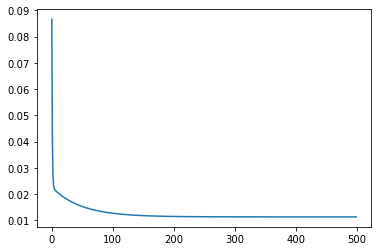

In [34]:
plt.plot(list(range(epochs)),errors)

In [35]:
slope

array([[0.7879091]])

In [36]:
inter

0.12763317276117495

In [37]:
predictions = []
for i in range(len(x)):
    y_pred = slope * x[i] + inter
    predictions.append(y_pred[0][0])


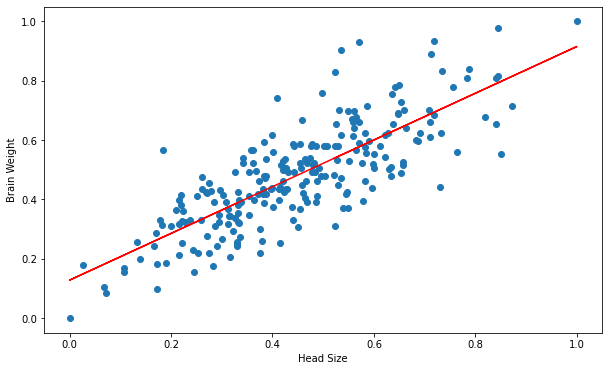

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,predictions,'r')
plt.xlabel("Head Size")
plt.ylabel("Brain Weight")
plt.show()

In [39]:
cost_functions(x,y,slope,inter)

0.011269597402411366

In [40]:
slope

array([[0.7879091]])

In [41]:
inter

0.12763317276117495

In [44]:
cost_functions(x,y,slope,inter)

0.011269597402411366